In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.datasets as ds

from mpl_toolkits.mplot3d import Axes3D

In [4]:
def gaussian(x, mu, sigma):
    return math.exp(-(x - mu) ** 2 / (2 * sigma * sigma)) / math.sqrt(2 * math.pi * sigma * sigma)

In [11]:
def importance_sampling_test(ori_sigma, sample_sigma):
    print("sigma = {0}".format(sample_sigma))
    origin = []
    for n in range(10):
        sum = 0
        for i in range(100000):
            a = np.random.normal(1.0, ori_sigma)
            sum += a
        origin.append(sum)
    isample = []
    
    for n in range(10):
        sum2 = 0
        for i in range(100000):
            a = np.random.normal(1.0, sample_sigma)
            ua = gaussian(a, 1.0, sample_sigma)
            na = gaussian(a, 1.0, ori_sigma)
            sum2 += a * na / ua
        isample.append(sum2)
    
    origin = np.array(origin)
    isample = np.array(isample)
    print('mean={0}, std={1}'.format(np.mean(origin), np.std(origin)))
    print('mean={0}, std={1}'.format(np.mean(isample), np.std(isample)))

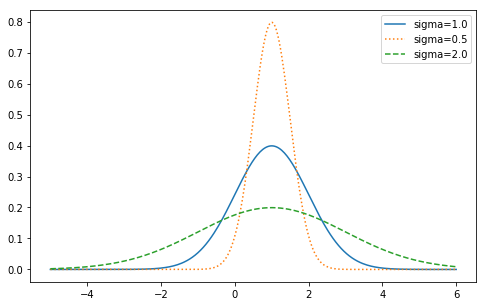

In [9]:
xs = np.linspace(-5, 6, 301)
y1 = [gaussian(x, 1.0, 1.0) for x in xs]
y2 = [gaussian(x, 1.0, 0.5) for x in xs]
y3 = [gaussian(x, 1.0, 2) for x in xs]

fig = plt.figure(figsize=(8,5))
plt.plot(xs, y1, label='sigma=1.0')
plt.plot(xs, y2, label='sigma=0.5', linestyle=':')
plt.plot(xs, y3, label='sigma=2.0', linestyle='--')
plt.legend()

In [12]:
importance_sampling_test(1.0, 1.0)
importance_sampling_test(1.0, 0.5)
importance_sampling_test(1.0, 2)

sigma = 1.0
mean=100041.69259967729, std=263.2116693980057
mean=99848.69477379422, std=350.95602692859273
sigma = 0.5
mean=100060.56113766268, std=488.5151578307943
mean=98739.04314375792, std=4876.178955141827
sigma = 2
mean=99803.80182563045, std=329.9807936810933
mean=100003.14381175459, std=361.4033549615852


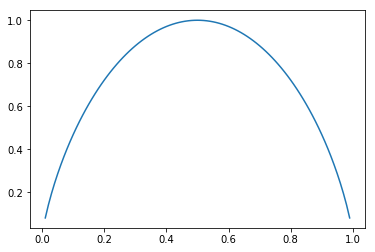

In [15]:
# entropy formula
# entropy(p) = -plogp - (1-p)log(1-p)

x = np.linspace(0.01, 0.99, 99)
y = -x * np.log2(x) - (1-x) * np.log2(1-x)
y[np.isnan(y)] = 0
plt.plot(x, y)
plt.show()

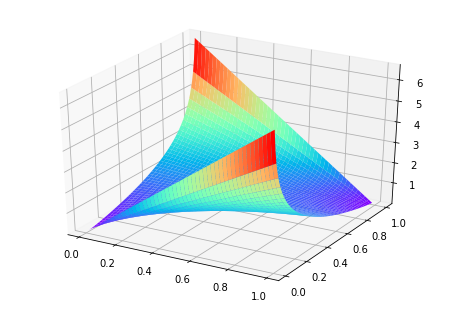

In [61]:
# cross-entropy

# P ~ B(...)
# Q ~ B(...)
# H(P,Q) = -PlogQ - (1-p)log(1-Q)

fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0.01, 0.99, 99)
Y = np.linspace(0.01, 0.99, 99)
X,Y = np.meshgrid(X, Y)
Z = -X * np.log2(Y) - (1-X) * np.log2(1-Y)
ax.plot_surface(X, Y, Z, cmap='rainbow')
plt.show()

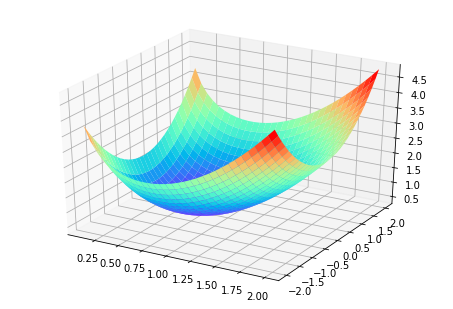

In [23]:
# relative entropy

# N2 ~ normal(0, 1)
# N1 ~ normal(mu, sigma)
# KL(mu, sigma) = -log(sigma) + (sigma^2 + mu^2) / 2 - 1/2

fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(0.1, 2, 31)
y = np.linspace(-2, 2, 31)
X,Y = np.meshgrid(x, y)
Z = -np.log(X) + X*X + Y*Y/2 - 0.5

# ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z, cmap='rainbow')

plt.show()

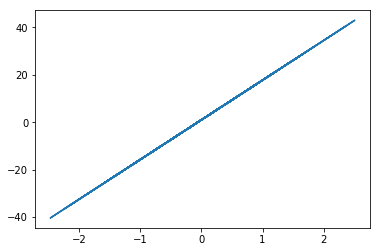

In [26]:
# regression
reg_data = ds.make_regression(100, 1, 1, 1, 1.0)
plt.plot(reg_data[0], reg_data[1])
plt.show()

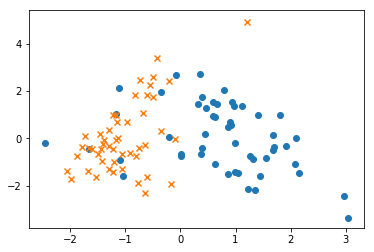

In [57]:
# classification
cls_data = ds.make_classification(100, 2, 2, 0, 0, 2)
pos = np.where(cls_data[1] == 1)
neg = np.where(cls_data[1] == 0)
X,Y = zip(*cls_data[0])
X,Y = np.array(X), np.array(Y)
plt.scatter(X[pos], Y[pos], marker='o')
plt.scatter(X[neg], Y[neg], marker='x')
plt.show()

In [62]:
help(np.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are